In [26]:
from sklearn.metrics import mean_absolute_error
import pandas as pd

train_file_path = './train.csv'
test_file_path = './test.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [40]:
y = train_data.SalePrice
X = train_data.drop(['SalePrice'],axis=1)

# 只考虑数值型数据

In [39]:
num_x = X.select_dtypes(exclude='object')
num_x=num_x.dropna(axis=1)
print(num_x.head())
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(num_x,y,train_size=0.7,test_size=0.3,random_state=0)
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(train_x,train_y)
print("决策树预测",mean_absolute_error(test_y,model.predict(test_x)))

   Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   
3   4          70     9550            7            5       1915          1970   
4   5          60    14260            8            5       2000          2000   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF   ...    GarageArea  WoodDeckSF  \
0         706           0        150   ...           548           0   
1         978           0        284   ...           460         298   
2         486           0        434   ...           608           0   
3         216           0        540   ...           642           0   
4         655           0        490   ...           836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0   

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
print(-1*cross_val_score(RandomForestRegressor(),num_x,y,scoring = 'mean_absolute_error',cv=10).mean())  #与上面含义相同

/home/plf/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/plf/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/plf/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/plf/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/hom

18687.089315068493


/home/plf/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/plf/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [29]:
x_without_missing = X.dropna(axis=1)
x_one_hot_encoding = pd.get_dummies(x_without_missing)
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x_one_hot_encoding,y,train_size=0.7,test_size=0.3,random_state=0)
rfr = RandomForestRegressor()
rfr.fit(train_x,train_y)
print("对类型数据进行量化后预测:",mean_absolute_error(test_y,rfr.predict(test_x)))

from sklearn.model_selection import cross_val_score
print(-1*cross_val_score(RandomForestRegressor(),x_one_hot_encoding,y,scoring = 'mean_absolute_error',cv=10).mean())  #与上面含义相同

对类型数据进行量化后预测: 19547.676484018266
19024.086438356164


# 扩展
如果train与test分割在两个数据文件中
one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)

one_hot_encoded_test_predictors = pd.get_dummies(test_predictors)

final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)

# XGBoost

In [38]:
import pandas as pd
train_file_path = './train.csv'
data = pd.read_csv(train_file_path)
data.dropna(axis=0, subset=['SalePrice'], inplace=True)  #inplace 的含义：在原始数据上进行修改，而不是生成新的数据表
y = data.SalePrice
X = data.drop(['SalePrice'],axis=1)

num_x = X.select_dtypes(exclude='object')
from sklearn.model_selection import train_test_split
# 下面的代码为什么会有as_matrix()
train_x,test_x,train_y,test_y = train_test_split(num_x.as_matrix(),y.as_matrix(),train_size=0.7,test_size=0.3,random_state=0)
from sklearn.preprocessing import Imputer
im = Imputer()
train_X = im.fit_transform(train_x)
test_X = im.transform(test_x)
from xgboost import XGBRegressor

my_model = XGBRegressor(learning_rate=0.01,n_estimators=1000,n_jobs=10,silent=False)
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)],verbose=True) #verbose= True打印日志
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(my_model.predict(test_x), test_y)))

[0]	validation_0-rmse:197642
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:195792
[2]	validation_0-rmse:193961
[3]	validation_0-rmse:192150
[4]	validation_0-rmse:190359
[5]	validation_0-rmse:188586
[6]	validation_0-rmse:186832
[7]	validation_0-rmse:185097
[8]	validation_0-rmse:183376
[9]	validation_0-rmse:181676
[10]	validation_0-rmse:179985
[11]	validation_0-rmse:178320
[12]	validation_0-rmse:176672
[13]	validation_0-rmse:175033
[14]	validation_0-rmse:173428
[15]	validation_0-rmse:171823
[16]	validation_0-rmse:170218
[17]	validation_0-rmse:168658
[18]	validation_0-rmse:167106
[19]	validation_0-rmse:165578
[20]	validation_0-rmse:164033
[21]	validation_0-rmse:162531
[22]	validation_0-rmse:161055
[23]	validation_0-rmse:159539
[24]	validation_0-rmse:158125
[25]	validation_0-rmse:156637
[26]	validation_0-rmse:155260
[27]	validation_0-rmse:153797
[28]	validation_0-rmse:152418
[29]	validation_0-rmse:151048
[30]	validation_0-rmse:149679
[31]	validation_

[262]	validation_0-rmse:38798.9
[263]	validation_0-rmse:38742
[264]	validation_0-rmse:38672.1
[265]	validation_0-rmse:38642.3
[266]	validation_0-rmse:38572.8
[267]	validation_0-rmse:38517.3
[268]	validation_0-rmse:38457.6
[269]	validation_0-rmse:38401.7
[270]	validation_0-rmse:38351.9
[271]	validation_0-rmse:38282.8
[272]	validation_0-rmse:38259
[273]	validation_0-rmse:38177.5
[274]	validation_0-rmse:38102.8
[275]	validation_0-rmse:38055.4
[276]	validation_0-rmse:37992.9
[277]	validation_0-rmse:37944
[278]	validation_0-rmse:37892.4
[279]	validation_0-rmse:37848.5
[280]	validation_0-rmse:37831
[281]	validation_0-rmse:37763
[282]	validation_0-rmse:37723.9
[283]	validation_0-rmse:37679.4
[284]	validation_0-rmse:37613.6
[285]	validation_0-rmse:37576.8
[286]	validation_0-rmse:37531.4
[287]	validation_0-rmse:37473.1
[288]	validation_0-rmse:37432.5
[289]	validation_0-rmse:37398.6
[290]	validation_0-rmse:37353.5
[291]	validation_0-rmse:37312.7
[292]	validation_0-rmse:37282.7
[293]	validation_0

# 使用plot_partial_dependence来研究单个变量对于结果的影响

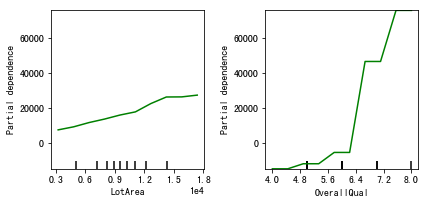

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                    learning_rate=0.1, loss='huber',
                                    random_state=1)
gbt.fit(train_x,train_y)
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
my_plots = plot_partial_dependence(gbt,       
                                   features=[2, 3], # column numbers of plots we want to show
                                   X=train_x,            # raw predictors data.
                                   feature_names=['','','LotArea','OverallQual'],# labels on graphs.注意写法
                                   grid_resolution=10)

In [29]:
print(train_x.head())

        Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
64      65          60     9375            7            5       1997   
682    683         120     2887            6            5       1996   
960    961          20     7207            5            7       1958   
1384  1385          50     9060            6            5       1939   
1100  1101          30     8400            2            5       1920   

      YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF   ...    GarageArea  \
64            1998         739           0        318   ...           645   
682           1997        1003           0        288   ...           431   
960           2008         696           0        162   ...             0   
1384          1950         204           0        356   ...           280   
1100          1950         290           0          0   ...           246   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
64           576           36   

In [42]:
num_x = X.select_dtypes(exclude='object')
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(num_x,y,train_size=0.7,test_size=0.3,random_state=0)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestRegressor
im_model_pipeline = make_pipeline(Imputer(),RandomForestRegressor())
im_model_pipeline.fit(train_x,train_y)
print(mean_absolute_error(im_model_pipeline.predict(test_x),test_y))

18825.511643835616
